In [ ]:
!nvidia-smi

Tue Dec 14 06:24:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Download Dataset

In [ ]:
!git clone https://github.com/datitran/raccoon_dataset.git

Cloning into 'raccoon_dataset'...
remote: Enumerating objects: 652, done.
remote: Total 652 (delta 0), reused 0 (delta 0), pack-reused 652
Receiving objects: 100% (652/652), 48.01 MiB | 29.87 MiB/s, done.
Resolving deltas: 100% (415/415), done.


# Download Package

In [ ]:
!git clone https://github.com/samson6460/tf2_YOLO.git

Cloning into 'tf2_YOLO'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 93 (delta 33), reused 93 (delta 33), pack-reused 0
Unpacking objects: 100% (93/93), done.


# YOLO V3

In [ ]:
from tf2_YOLO.yolov3 import Yolo

class_names = ['raccoon']
yolo = Yolo(class_names=class_names)

## Read file

In [ ]:
img_path = "/content/raccoon_dataset/images"
label_path = "/content/raccoon_dataset/annotations"

train_img, train_label = yolo.read_file_to_dataset(
    img_path,
    label_path,
    shuffle=False,
    thread_num=50)

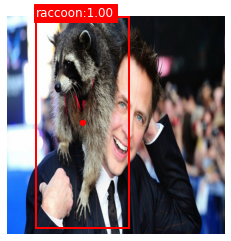

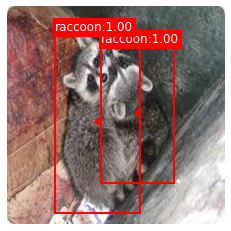

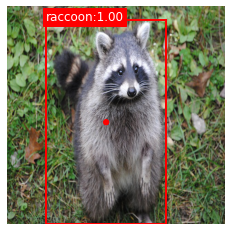

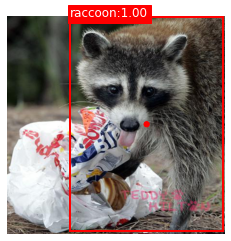

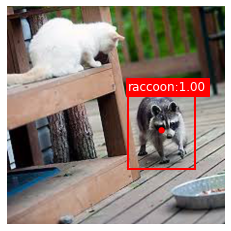

In [ ]:
for i in range(5):
    yolo.vis_img(train_img[i], train_label[2][i])

## Split the data

In [ ]:
test_img = train_img[-20:]
test_label = []
for i in range(len(train_label)):
    test_label.append(train_label[i][-20:])
    print("shape of testing label[%s]:" % i, test_label[i].shape)
print("shape of testing img:", test_img.shape)
print()

valid_img = train_img[160:180]
valid_label = []
for i in range(len(train_label)):
    valid_label.append(train_label[i][160:180])
    print("shape of validation label[%s]:" % i, valid_label[i].shape)
print("shape of validation img:", valid_img.shape)
print()

train_img = train_img[:160]
new_train_label = []
for i in range(len(train_label)):
    new_train_label.append(train_label[i][:160])
    print("shape of training label[%s]:" % i, new_train_label[i].shape)
train_label = new_train_label
print("shape of training img:", train_img.shape)

shape of testing label[0]: (20, 13, 13, 6)
shape of testing label[1]: (20, 26, 26, 6)
shape of testing label[2]: (20, 52, 52, 6)
shape of testing img: (20, 416, 416, 3)

shape of validation label[0]: (20, 13, 13, 6)
shape of validation label[1]: (20, 26, 26, 6)
shape of validation label[2]: (20, 52, 52, 6)
shape of validation img: (20, 416, 416, 3)

shape of training label[0]: (160, 13, 13, 6)
shape of training label[1]: (160, 26, 26, 6)
shape of training label[2]: (160, 52, 52, 6)
shape of training img: (160, 416, 416, 3)


## Get anchor boxes

In [ ]:
from utils.kmeans import kmeans, iou_dist, euclidean_dist

In [ ]:
all_boxes = train_label2[train_label2[..., 4] == 1][..., 2:4]
anchor_boxes = kmeans(
    all_boxes,
    n_cluster=9,
    dist_func=iou_dist,
    stop_dist=0.000001)
print(anchor_boxes)

epoch  1: loss = 0.2660
epoch  2: loss = 0.1098
epoch  3: loss = 0.0313
epoch  4: loss = 0.0249
epoch  5: loss = 0.0221
epoch  6: loss = 0.0228
epoch  7: loss = 0.0156
epoch  8: loss = 0.0162
epoch  9: loss = 0.0149
epoch 10: loss = 0.0142
epoch 11: loss = 0.0119
epoch 12: loss = 0.0116
epoch 13: loss = 0.0128
epoch 14: loss = 0.0111
epoch 15: loss = 0.0110
epoch 16: loss = 0.0114
epoch 17: loss = 0.0093
epoch 18: loss = 0.0089
epoch 19: loss = 0.0091
epoch 20: loss = 0.0107
epoch 21: loss = 0.0099
epoch 22: loss = 0.0088
epoch 23: loss = 0.0082
epoch 24: loss = 0.0071
epoch 25: loss = 0.0064
epoch 26: loss = 0.0057
epoch 27: loss = 0.0074
epoch 28: loss = 0.0059
epoch 29: loss = 0.0076
epoch 30: loss = 0.0074
epoch 31: loss = 0.0057
epoch 32: loss = 0.0050
epoch 33: loss = 0.0054
epoch 34: loss = 0.0056
epoch 35: loss = 0.0057
epoch 36: loss = 0.0053
epoch 37: loss = 0.0045
epoch 38: loss = 0.0025
epoch 39: loss = 0.0038
epoch 40: loss = 0.0038
epoch 41: loss = 0.0037
epoch 42: loss =

In [ ]:
import numpy as np

anchor_boxes = np.sort(anchor_boxes, axis=0)[::-1]
display(anchor_boxes)

array([[0.21696429, 0.28630952],
       [0.20478723, 0.26112589],
       [0.19371811, 0.25125425],
       [0.1853782 , 0.23777225],
       [0.17648502, 0.22706038],
       [0.16771635, 0.2157492 ],
       [0.15889143, 0.20403494],
       [0.14906909, 0.18735233],
       [0.13243664, 0.16764748]])

## Create model

In [ ]:
anchors=[[0.21696429, 0.28630952],
    [0.20478723, 0.26112589],
    [0.19371811, 0.25125425],
    [0.18537820, 0.23777225],
    [0.17648502, 0.22706038],
    [0.16771635, 0.21574920],
    [0.15889143, 0.20403494],
    [0.14906909, 0.18735233],
    [0.13243664, 0.16764748]]

yolo.create_model(anchors=anchors)
yolo.model.summary()

246849536/246842976 [==============================] - 4s 0us/step
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d_109 (Conv2D)             (None, 416, 416, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_67 (BatchNo (None, 416, 416, 32) 128         conv2d_109[0][0]                 
__________________________________________________________________________________________________
leaky_re_lu_67 (LeakyReLU)      (None, 416, 416, 32) 0           batch_normalization_67[0][0]     
________________________

## Compile model

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  if epoch <= 100:
    return lr
  else:
    return 5e-5

callback = LearningRateScheduler(scheduler)

In [ ]:
from utils.tools import get_class_weight

binary_weight_list = []

for i in range(len(train_label)):
    binary_weight_list.append(
        get_class_weight(
        train_label[i][..., 4:5],
        method='binary'
        )
    )
print(binary_weight_list)

[array([0.00647659]), array([0.00161132]), array([0.00040234])]


In [ ]:
from tensorflow.keras.optimizers import SGD, Adam

ignore_thresh = 0.7
use_focal_loss = True

loss_weight = {
    "xy":1,
    "wh":1,
    "conf":5,
    "prob":1
    }

loss = yolo.loss(
    binary_weight_list,
    loss_weight=loss_weight,
    ignore_thresh=ignore_thresh,
    use_focal_loss=use_focal_loss
    )

metrics = yolo.metrics("obj+iou+class")

yolo.model.compile(
    optimizer=Adam(lr=1e-4),
    #optimizer=SGD(lr=1e-10, momentum=0.9, decay=5e-4),
    loss=loss,
    metrics=metrics
    )

## Train model

In [ ]:
train_history = yolo.model.fit(
    train_img,
    train_label,
    epochs=100,
    batch_size=5,
    verbose=1,
    validation_data=(valid_img, valid_label),
    callbacks=[callback]
    )

Epoch 1/100
32/32 [==============================] - 25s 435ms/step - loss: 20.9900 - concatenate_7_loss: 5.8798 - concatenate_8_loss: 5.9327 - concatenate_9_loss: 9.1776 - concatenate_7_obj_acc: 0.4694 - concatenate_7_iou_acc: 0.0115 - concatenate_7_class_acc: 0.0277 - concatenate_8_obj_acc: 0.3380 - concatenate_8_iou_acc: 0.0017 - concatenate_8_class_acc: 0.0038 - concatenate_9_obj_acc: 0.1428 - concatenate_9_iou_acc: 1.4710e-04 - concatenate_9_class_acc: 5.7140e-04 - val_loss: nan - val_concatenate_7_loss: 4.9947 - val_concatenate_8_loss: nan - val_concatenate_9_loss: nan - val_concatenate_7_obj_acc: 0.6956 - val_concatenate_7_iou_acc: 0.0096 - val_concatenate_7_class_acc: 0.0309 - val_concatenate_8_obj_acc: 0.7643 - val_concatenate_8_iou_acc: nan - val_concatenate_8_class_acc: 0.0084 - val_concatenate_9_obj_acc: 0.1195 - val_concatenate_9_iou_acc: nan - val_concatenate_9_class_acc: 7.1002e-04
Epoch 2/100
32/32 [==============================] - 12s 373ms/step - loss: 6.4900 - conca

## Predict and evaluate

In [ ]:
prediction = yolo.model.predict(test_img, batch_size=10)

### Visualize some results

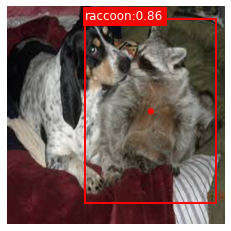

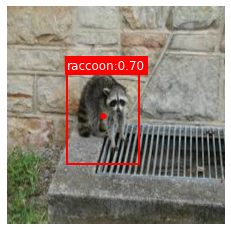

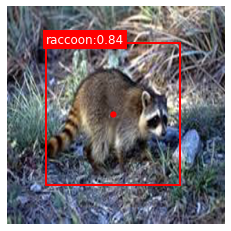

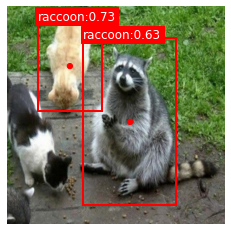

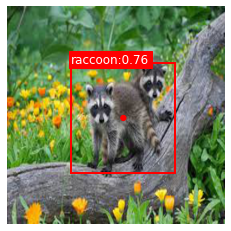

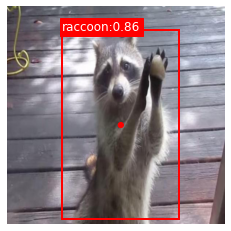

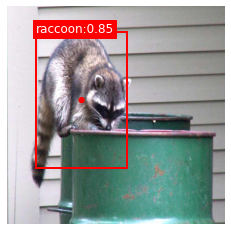

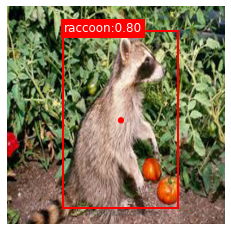

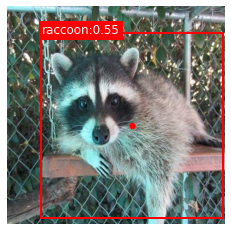

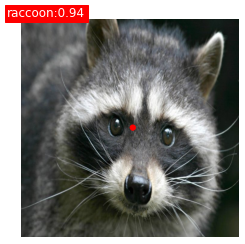

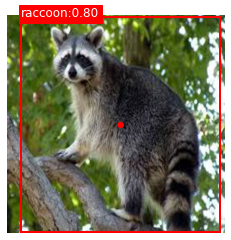

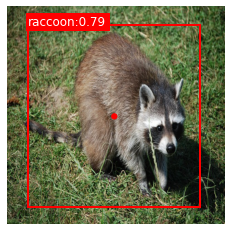

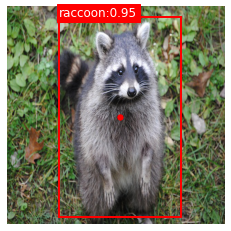

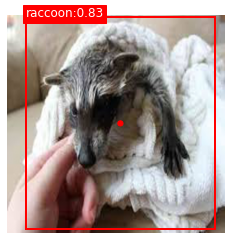

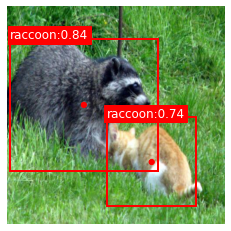

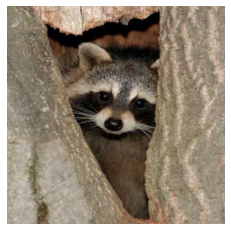

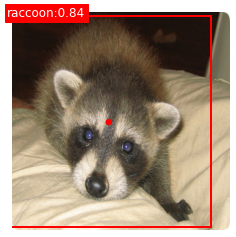

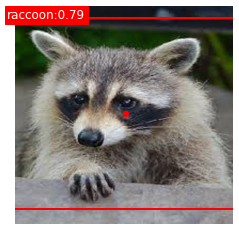

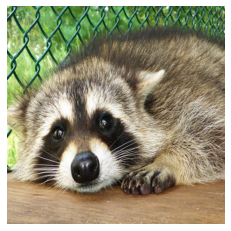

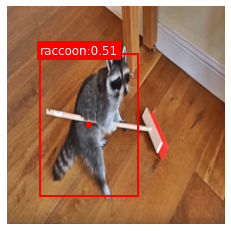

In [ ]:
for i in range(len(test_img)):
    fig_ax = yolo.vis_img(
        test_img[i],
        test_label[i],
        text_fontsize=0,
        box_color="b",
        point_radius=0,
        return_fig_ax=True
        )
    yolo.vis_img(
        test_img[i],
        # prediction[2][i],
        prediction[1][i],
        prediction[0][i],
        conf_threshold=0.2,
        nms_mode=1,
        nms_threshold=0.1,
        fig_ax=fig_ax
        )

### Show score table

In [ ]:
from utils.measurement import create_score_mat

In [ ]:
create_score_mat(
    test_label[2],
    # prediction[2],
    prediction[1],
    prediction[0],
    class_names=class_names,
    conf_threshold=0.5,
    nms_mode=2,
    nms_threshold=0.5,
    version=3)

,precision,recall,F1-score
raccoon,0.9,0.857143,0.878049
